## <font color=brown>Problem Statement</font>

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [733]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


### <font color=brown>Understanding Data</font>

In [734]:
# Reading the Dataset
df = pd.read_csv('/Users/shweta/Downloads/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [735]:
# Checking the shape of the Dataset 
df.shape

(167, 10)

The Dataset has 167 Rows and 10 columns 

In [736]:
# Checking column Datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


All the columns are numeric expect "country" column 

In [737]:
# Checking for null values 
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no null values in the Dataset

In [738]:
# Checking for duplicates 
df.duplicated(subset = ['country'], keep = False).sum()

0

No Duplicate values present in Dataset

In [739]:
# Checking for unique values from each columns
df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [740]:
# Checking statistical summary of Dataset
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


### <font color=brown>Data Transformation</font>

In [741]:
# Converting health, imports and exports columns to their actual values 

df['health']=(df['health']*df['gdpp'])/100
df['imports']=(df['imports']*df['gdpp'])/100
df['exports']=(df['exports']*df['gdpp'])/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### <font color=brown>Data Visualisation</font>

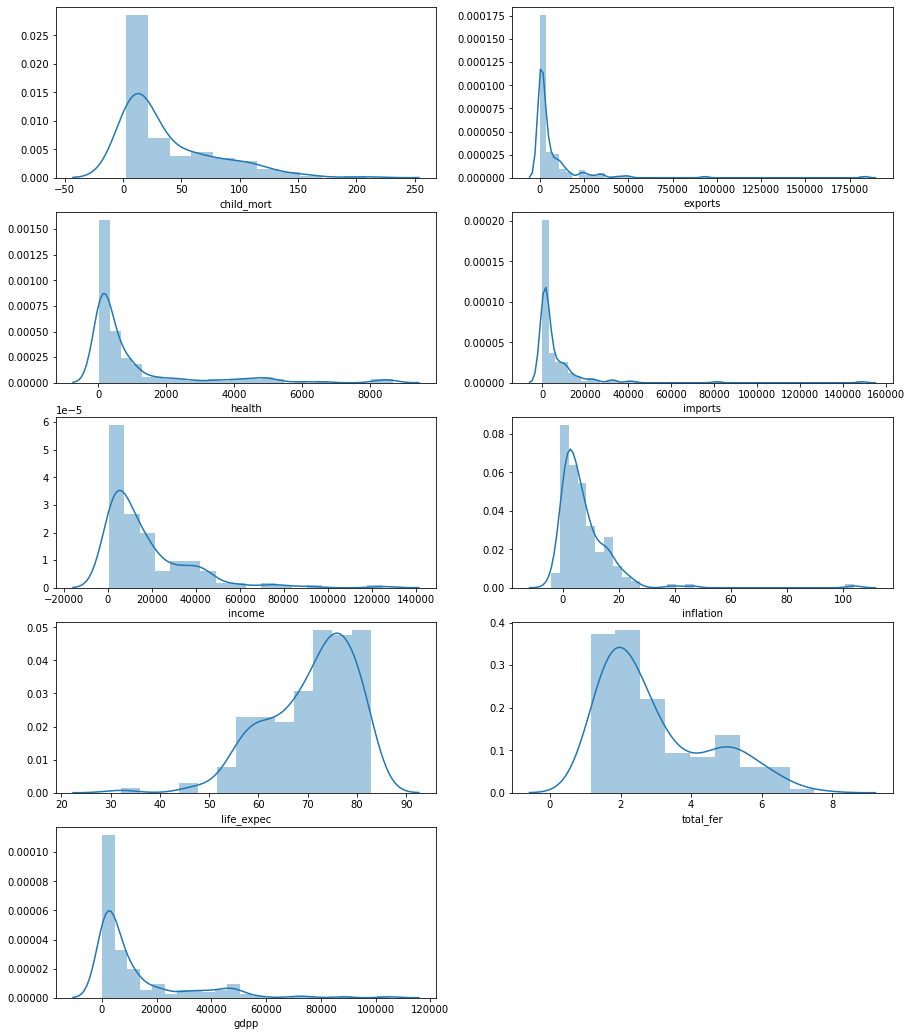

In [742]:
# Creating distribution plots for all columns 

plt.figure(figsize = (15,22))
f = df.columns[1:]
for i in enumerate(f):
    plt.subplot(6,2,i[0]+1)
    sns.distplot(df[i[1]])

We will use all columns for clustering but we will use only 'gdpp' 'child_mort' and 'income' columns for profiling 

<Figure size 288x288 with 0 Axes>

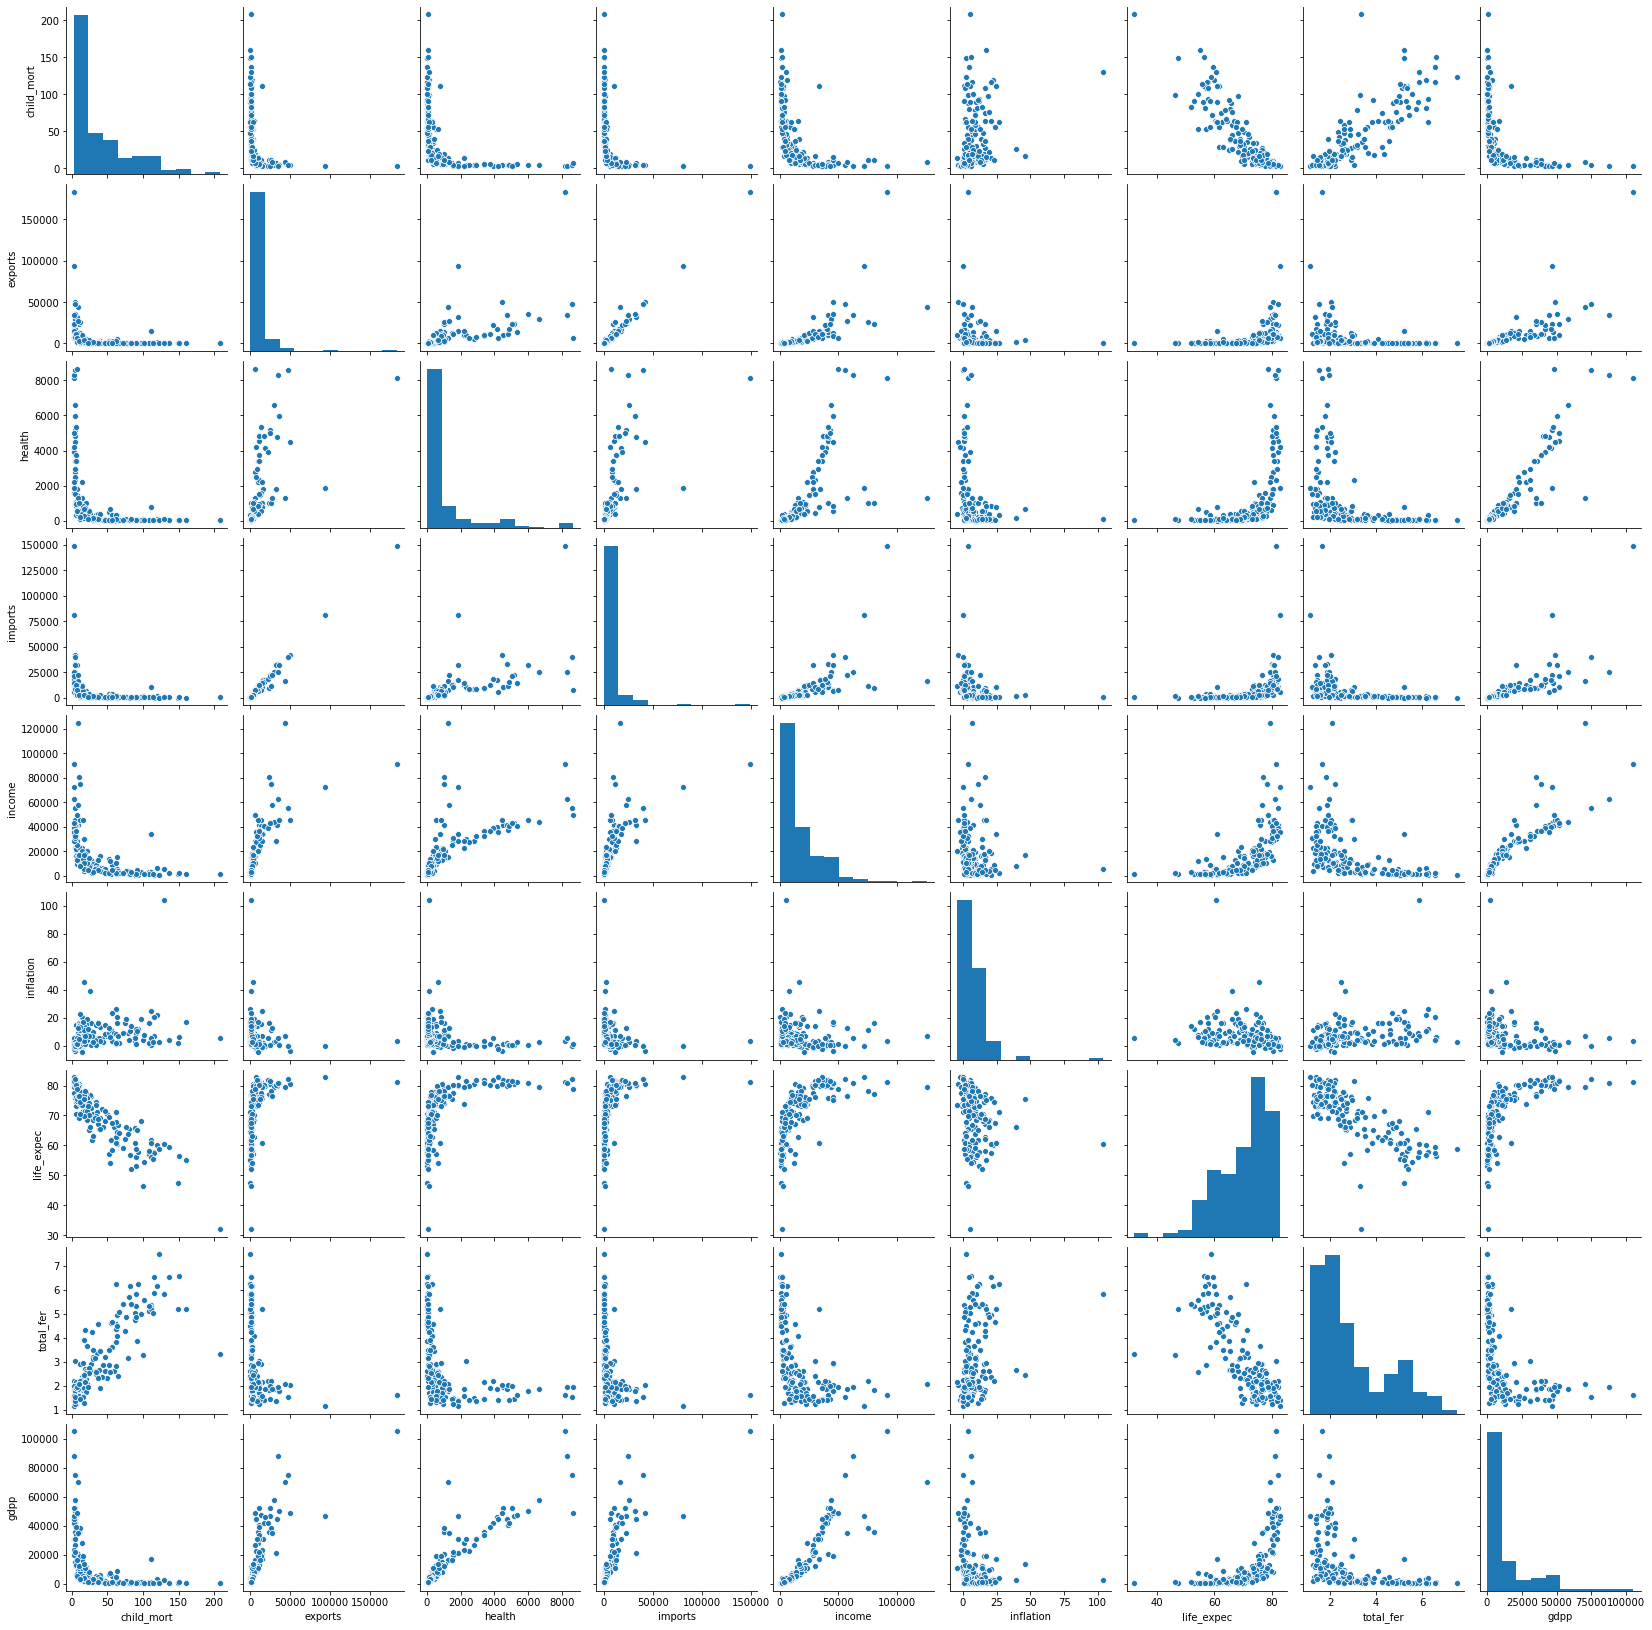

In [743]:
# Creating pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(df)
plt.show()

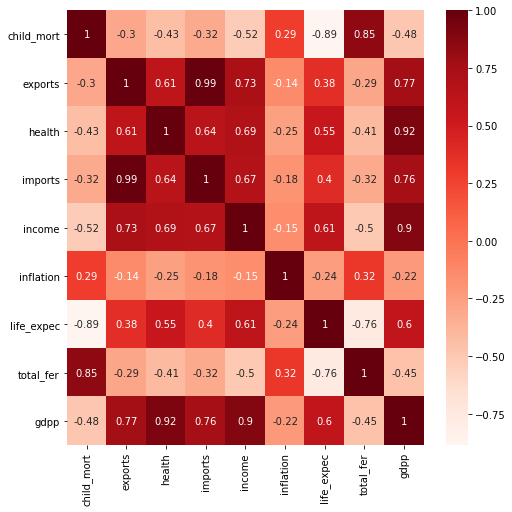

In [744]:
# Creating heatmap to understand the correlation
plt.figure(figsize = (8,8))  
sns.heatmap(df.corr(),annot = True,cmap="Reds")

We can observe high correlation between the following pairs:
1. child_mort and total_fer
2. imports and exports 
3. gdpp and health 
4. income and gdpp

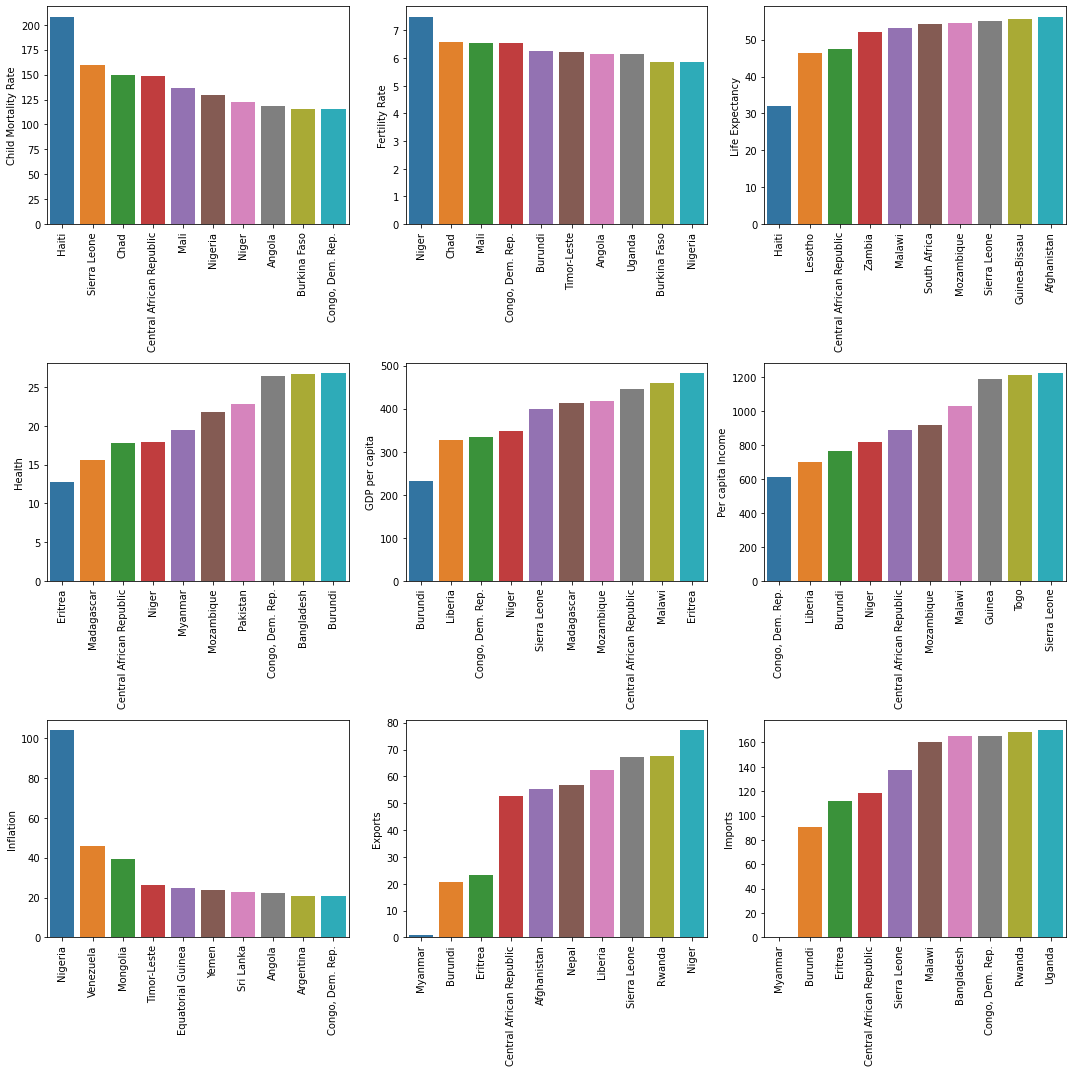

In [745]:
# Univariate Analysis: Checking for top/bottom 10 countries from each column as per column definition 

fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
bottom10_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.
bottom10_health = df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.
bottom10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person
bottom10_income = df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP
top10_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP
bottom10_exports = df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')

# Imports: Imports of goods and services. Given as %age of the Total GDP
bottom10_imports = df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

### <font color=brown>Outlier Analysis and Treatment</font>

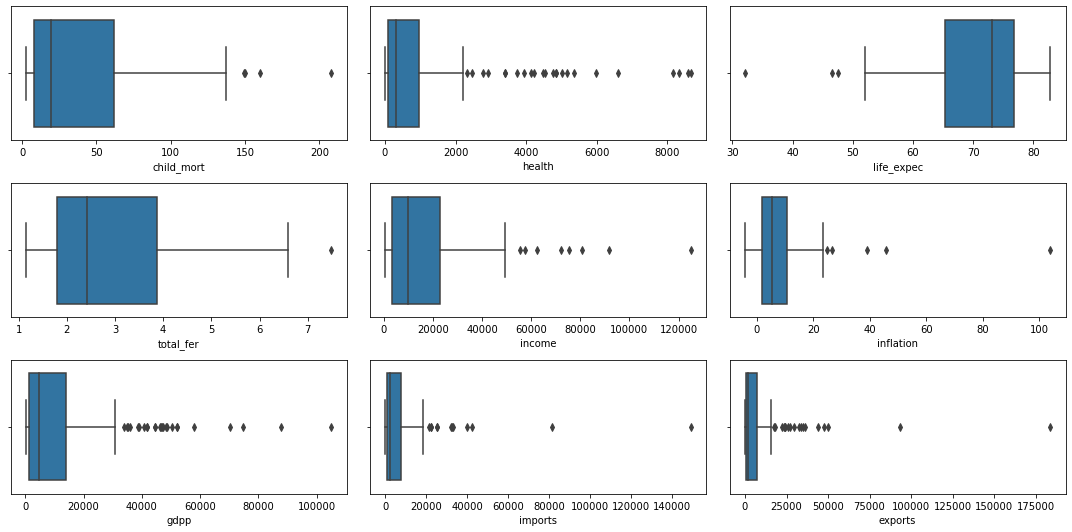

In [746]:
# Outlier Analysis 

fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['health'], ax = axs[0,1])
plt3 = sns.boxplot(df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df['exports'], ax = axs[2,2])

plt.tight_layout()

We can see that all the columns are having Outliers.
We cannot exclude these outliers as we have only 167 samples with us and excluding outliers can led to loss of Data. 
Instead, we can perform soft capping for some columns.

1. For columns such as child_mort, inflation, total_fer we should not do anything to the upper range outliers but we may deal with the lower range outlier through capping.
2. But for the rest of the columns, we should not do anything for the lower range outliers but we may deal with the upper range outliers through capping.

In [747]:
# Creating copy of original dataframe 
df_cap = df.copy()

# Creating list of columns which need lower capping and higher capping 
lower_cap = ['child_mort', 'inflation', 'total_fer']
higher_cap = ['health', 'life_expec', 'income', 'gdpp', 'imports', 'exports']

In [748]:
# Defining function for lower capping 
def iqr_capping_lower(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, df[col],
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [749]:
# Calling function of lower capping on df_cap dataframe 
iqr_capping_lower(df_cap,lower_cap,1.5)

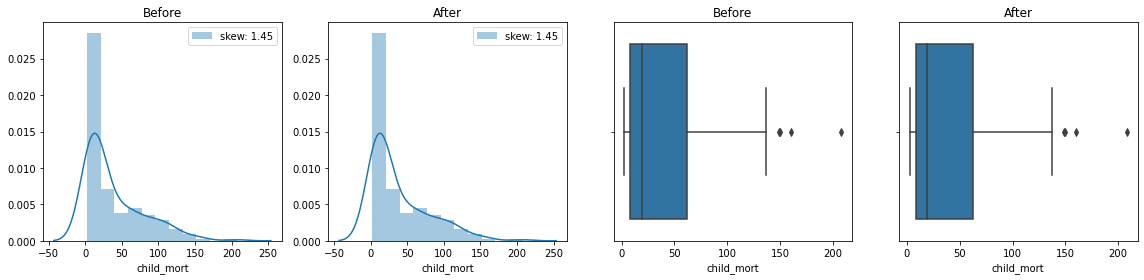

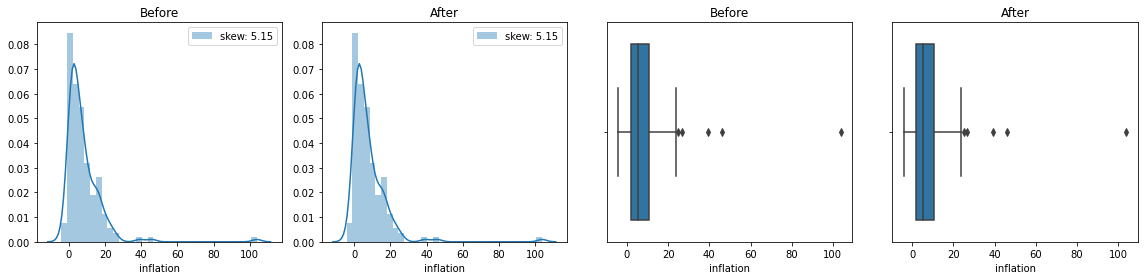

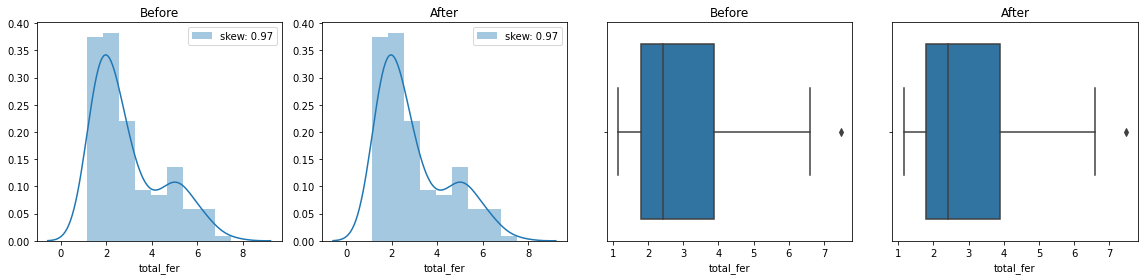

In [750]:
# Checking Before and After results 
for col in lower_cap:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()


We can see that the before and after results for 'child_mort', 'inflation', 'total_fer' columns are same because here we tried capping lower end outliers but lower end outliers are not present in these columns at all.

In [751]:
# Creating function for higher capping 
def iqr_capping_higher(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker,df[col], df[col]))

In [752]:
# Calling higher capping function on df_cap dataframe

iqr_capping_higher(df_cap,higher_cap,1.5)

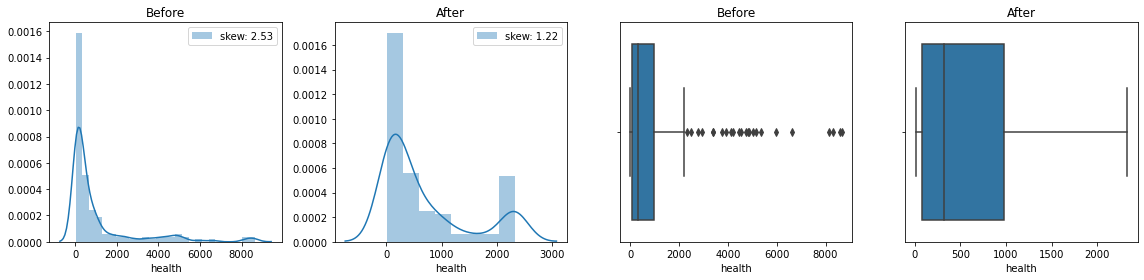

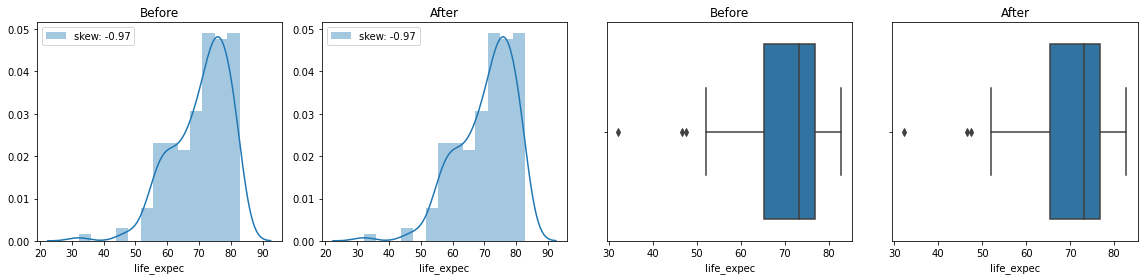

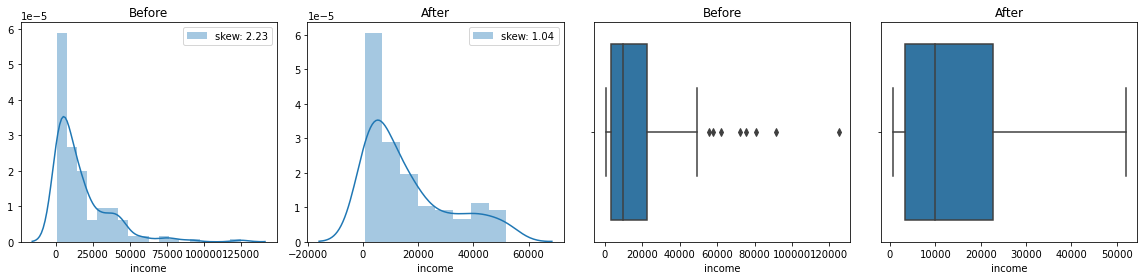

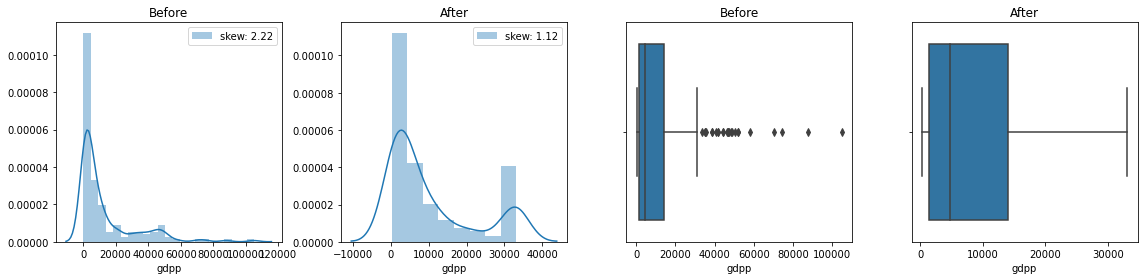

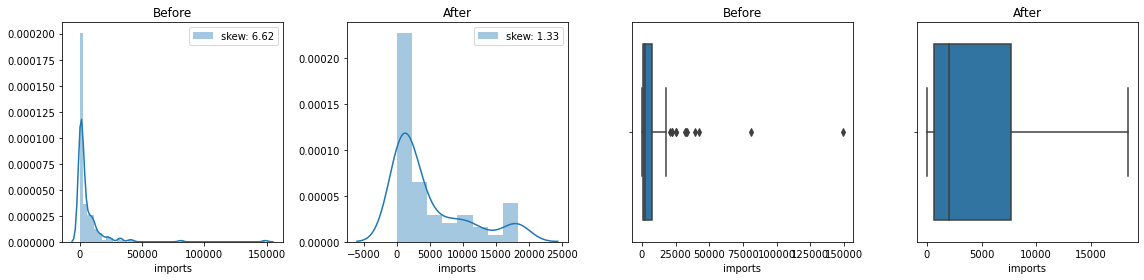

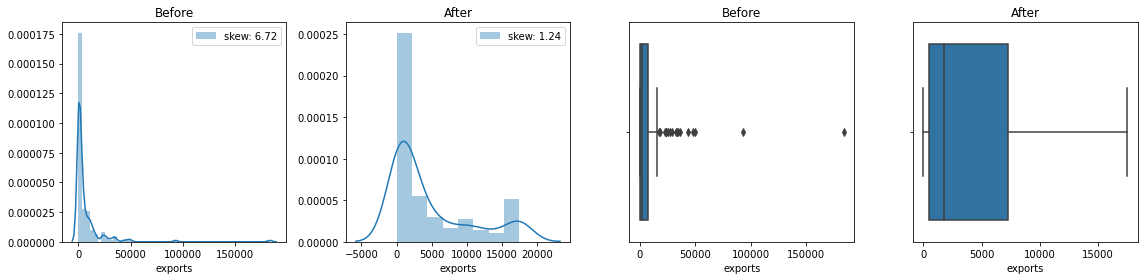

In [753]:
# Checking Before and After results 

for col in higher_cap:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

We can observe that higher value data points are capped where as lower value data points as kept as it is (because they are our point of interest). 

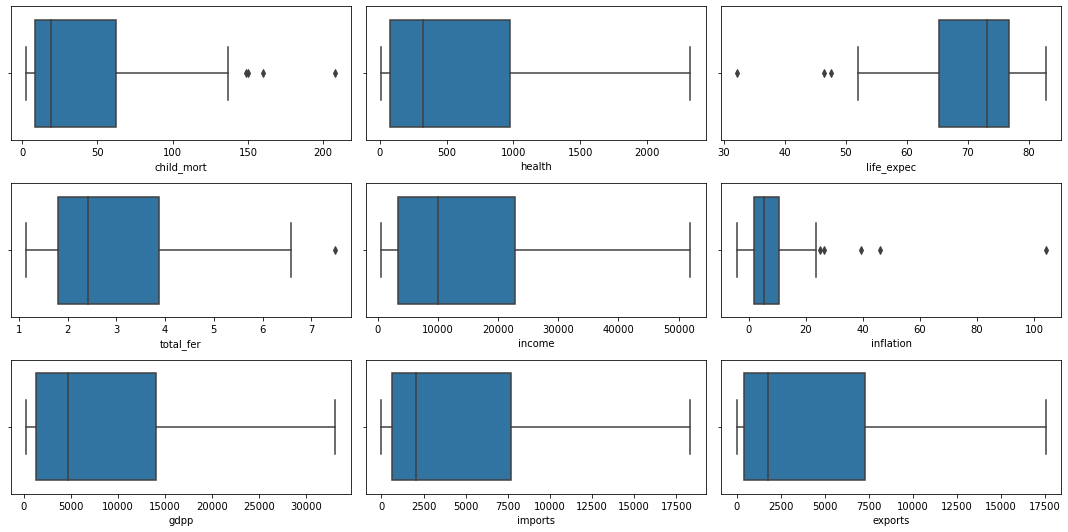

In [754]:
# Outlier Analysis for df_cap dataframe

fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df_cap['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df_cap['health'], ax = axs[0,1])
plt3 = sns.boxplot(df_cap['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df_cap['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df_cap['income'], ax = axs[1,1])
plt6 = sns.boxplot(df_cap['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df_cap['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df_cap['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df_cap['exports'], ax = axs[2,2])

plt.tight_layout()

We can see that capping is done properly while preserving our data points of interest.


### We will use df_cap dataframe for further analysis and cluster formation 

### <font color=brown>Hopkins Test: Checking clustering tendency</font>

In [755]:
# Calculating the Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [756]:
hopkins(df.drop("country", axis = 1))

0.8781911565117372

#### After running the Hopkins test multiple times we get the results greater than 0.80.
#### Since the value is > 0.8 the given dataset has a good tendency to form clusters.

### <font color=brown>Scaling</font>

In [757]:
# Setting country column as Index
df_cap.set_index('country',inplace=True)
df_cap.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [758]:
# Importing the scaling library - StandardScaler

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Scaling the dataset with Standard Scaler 

scaled_df=scaler.fit_transform(df_cap)
scaled_df=pd.DataFrame(scaled_df,columns=df_cap.columns)

scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.800564,-0.795563,-0.794660,-0.943936,0.157336,-1.619092,1.902882,-0.846341
1,-0.538949,-0.613150,-0.513920,-0.488076,-0.395181,-0.312347,0.647866,-0.859973,-0.540827
2,-0.272833,-0.515576,-0.616010,-0.591590,-0.199291,0.789274,0.670423,-0.038404,-0.508868
3,2.007808,-0.431911,-0.722418,-0.571509,-0.660984,1.387054,-1.179234,2.128151,-0.589198
4,-0.695634,0.144450,0.069070,0.428104,0.209637,-0.601749,0.704258,-0.541946,0.159686


### <font color=brown>Finding the best value of K</font>
### <font color=brown>Silhouette Score</font>

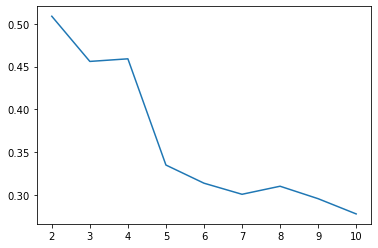

In [759]:
# Silhouette Score 
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(scaled_df)
    ss.append([k, silhouette_score(scaled_df, kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])

We look at the maximum value in case of Silhouette Score.
From the graph we can infer that ideal number of cluster value can be 3 or 4.

### <font color=brown>SSD: Elbow curve</font>

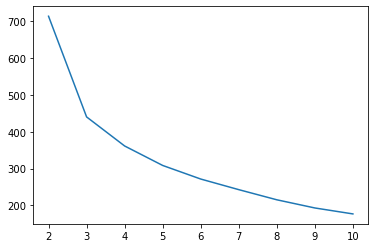

In [760]:
# ssd elbow curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(scaled_df)
    ssd.append([k, kmean.inertia_])

ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

We can observe that the elbow is formed between 3 to 5 and hence value between 3-5 will be suitable for cluster formation.

### <font color=brown>K Means Clustering</font>

#### Proceeding with K == 4

In [761]:
# Performing K means clustering  
kmean = KMeans(n_clusters = 4, random_state = 0)
kmean.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

In [762]:
# Obtaining Labels  
kmean.labels_

array([3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0,
       0, 1, 0, 3, 3, 0, 3, 1, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 1, 1,
       1, 0, 0, 0, 0, 3, 3, 1, 0, 1, 1, 3, 3, 0, 1, 3, 1, 0, 0, 3, 3, 0,
       3, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 3, 3, 1, 0, 3, 0, 0, 3,
       3, 0, 0, 1, 0, 3, 3, 0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       1, 1, 3, 2, 1, 1, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 1, 3, 0, 0,
       3, 1, 1, 1, 3, 0, 1, 1, 0, 0, 3, 0, 1, 1, 0, 3, 0, 3, 3, 0, 0, 0,
       0, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3], dtype=int32)

In [763]:
# Attaching labels to Original Dataframe 'df' 
df['cluster_id'] = kmean.labels_

In [764]:
# Finding number of data points in each cluster  
df.cluster_id.value_counts()

0    81
3    44
1    41
2     1
Name: cluster_id, dtype: int64

#### Using K means clustering we get 4 clusters.
Cluster 0: 81 datapoints <br>
Cluster 1: 41 datapoints <br>
Cluster 2: 01 datapoints <br>
Cluster 3: 44 datapoints <br>
#### Here we do not have sufficient data points in each cluster. So we instead of k = 4, we choose k = 3 and perform same analysis

#### Proceeding with K == 3

In [765]:
# Performing K means clustering  
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(scaled_df)

KMeans(n_clusters=3, random_state=0)

In [766]:
# Obtaining Labels  
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [767]:
# Attaching labels to Original Dataframe 'df' 
df['cluster_id'] = kmean.labels_

In [768]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [769]:
# Finding number of data points in each cluster  
df.cluster_id.value_counts()

1    81
0    45
2    41
Name: cluster_id, dtype: int64

#### Using K means clustering we get 3 clusters.
Cluster 0: 45 datapoints <br>
Cluster 1: 81 datapoints <br>
Cluster 2: 41 datapoints <br>

#### We have sufficient data points in each cluster and so we decide to keep K as 3

### <font color=brown>Plotting Clusters using K means method</font>

#### Our objective is to find the cluster that has LOW GDPP, LOW INCOME and HIGH CHILD_MORT
So we consider the columns gdpp, child_mort and income for recognising and differentiating the clusters of developed countries from the clusters of under-developed countries.

In [770]:
# Creating dataframe with gdpp, child_mort, income and cluster_id columns for visualisation 
vis = df[['gdpp', 'child_mort', 'income','cluster_id']]

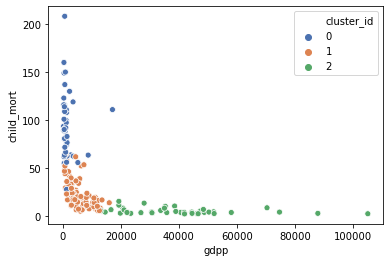

In [771]:
# Plotting gdpp vs child_mort
sns.scatterplot(data=vis, x="gdpp", y="child_mort", hue="cluster_id", palette="deep")

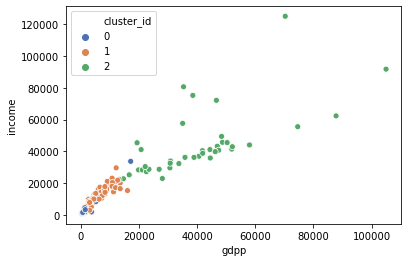

In [772]:
# Plotting gdpp vs income
sns.scatterplot(data=vis, x="gdpp", y="income", hue="cluster_id", palette="deep")

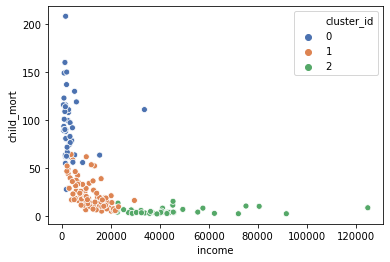

In [773]:
# Plotting income vs child_mort
sns.scatterplot(data=vis, x="income", y="child_mort", hue="cluster_id", palette="deep")

In [774]:
# Grouping dataframe using cluster ID  
df[['gdpp', 'child_mort', 'income','cluster_id']].groupby('cluster_id').mean()

,gdpp,child_mort,income
cluster_id,,,
0,1633.600000,94.537778,3312.733333
1,5770.395062,23.520988,11250.493827
2,39612.195122,5.651220,43970.731707


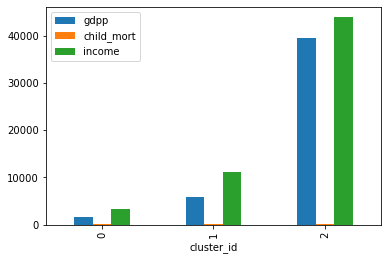

In [775]:
# Plotting clusters 
df[['gdpp', 'child_mort', 'income','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

#### We can observe that cluster Id 0 has low GDPP, low Income and high Child mortality rate and hence cluster 0 contains data points of our interest 

In [776]:
# Checking for number of countries in cluster 0
final_df = df[df['cluster_id']==0]
final_df.shape

(45, 11)

We have 45 countries which belong to cluster 0 (Cluster that needs AID)

In [777]:
# Finding the top 10 countries that has LOW GDPP, LOW INCOME and HIGH CHILD_MORT 
top10_aid = final_df.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)
top10_aid

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,0


#### <font color=brown>List of countries in direst need of aid using K means clustering</font>

In [778]:
list(top10_aid.country)

['Burundi',
 'Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Sierra Leone',
 'Madagascar',
 'Mozambique',
 'Central African Republic',
 'Malawi',
 'Eritrea']

We obtained the list of countries which are in direst need of aid

### <font color=brown>Hierarchical Clustering</font>

In [779]:
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.800564,-0.795563,-0.794660,-0.943936,0.157336,-1.619092,1.902882,-0.846341
1,-0.538949,-0.613150,-0.513920,-0.488076,-0.395181,-0.312347,0.647866,-0.859973,-0.540827
2,-0.272833,-0.515576,-0.616010,-0.591590,-0.199291,0.789274,0.670423,-0.038404,-0.508868
3,2.007808,-0.431911,-0.722418,-0.571509,-0.660984,1.387054,-1.179234,2.128151,-0.589198
4,-0.695634,0.144450,0.069070,0.428104,0.209637,-0.601749,0.704258,-0.541946,0.159686


In [780]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [781]:
# Importing Libraries
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Single Linkage Method 

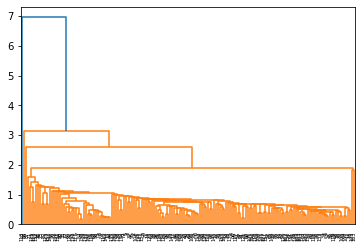

In [782]:
# Single Linkage
merging_sl = linkage(scaled_df, method="single", metric='euclidean')
dendrogram(merging_sl)
plt.show()

Hierarchy is not clear using Single Linkage Method

### Complete Linkage Method 

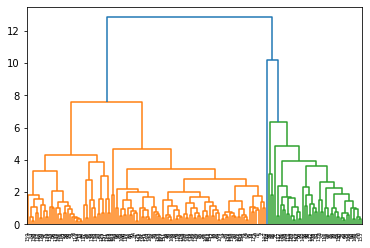

In [783]:
# Complete Linkage
merging_cl = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(merging_cl)
plt.show()

Hierarchy is clear using Complete Linkage Method. <br>
We can form 3 or 4 clusters for analysis.

### Proceeding with k = 4 for Hierarchical clustering 

In [784]:
cluster_labels = cut_tree(merging_cl, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 3, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [785]:
# Creating copy of original dataframe 
df_hc = df.copy()

In [786]:
# Assign cluster labels to df_hc dataframe 
df_hc['cluster_labels'] = cluster_labels
df_hc.drop('cluster_id', axis =1, inplace = True)
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [787]:
# Checking number of data points in each cluster 
df_hc.cluster_labels.value_counts()

1    77
0    47
2    42
3     1
Name: cluster_labels, dtype: int64

### <font color=brown>Plotting clusters using Hierarchical Clustering method </font>

In [788]:
# Creating dataframe with gdpp, child_mort, income and cluster_id columns for visualisation 
for_vis = df_hc[['gdpp', 'child_mort', 'income','cluster_labels']]

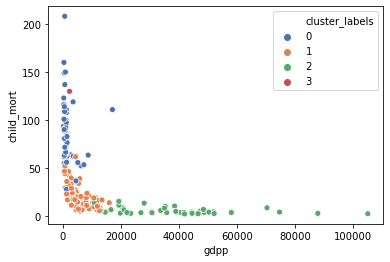

In [789]:
# Plotting gdpp vs child_mort
sns.scatterplot(data=for_vis, x="gdpp", y="child_mort", hue="cluster_labels", palette="deep")

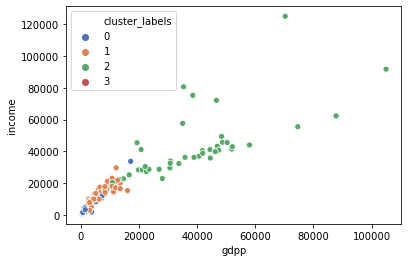

In [790]:
# Plotting gdpp vs income
sns.scatterplot(data=for_vis, x="gdpp", y="income", hue="cluster_labels", palette="deep")

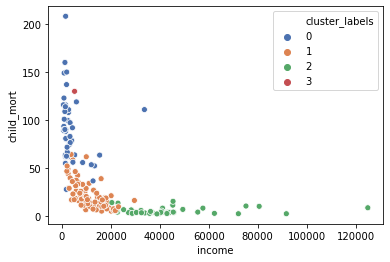

In [791]:
# Plotting income vs child_mort
sns.scatterplot(data=for_vis, x="income", y="child_mort", hue="cluster_labels", palette="deep")

In [792]:
# Grouping dataframe using cluster_labels  
df_hc[['gdpp', 'child_mort', 'income','cluster_labels']].groupby('cluster_labels').mean()

,gdpp,child_mort,income
cluster_labels,,,
0,1900.255319,90.793617,3870.702128
1,5694.441558,22.697403,11076.493506
2,38926.190476,5.859524,43409.523810
3,2330.000000,130.000000,5150.000000


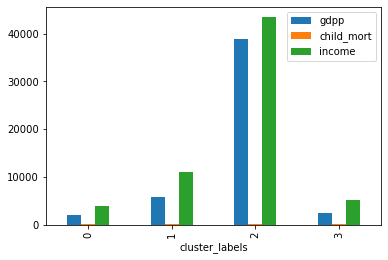

In [793]:
# Plotting clusters 
df_hc[['gdpp', 'child_mort', 'income','cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar')

#### We can observe that cluster Id 0 has low GDPP, low Income and second highest Child mortality rate and hence cluster 0 contains data points of our interest <br>
#### Cluster 3 has highest mortality rate 

In [794]:
# Checking for number of countries in cluster 0
final_df_hc = df_hc[df_hc['cluster_labels']==0]
final_df_hc.shape

(47, 11)

We have 47 countries which belong to cluster 0 (Cluster that needs AID)

In [795]:
# Finding the top 10 countries that has LOW GDPP, LOW INCOME and HIGH CHILD_MORT 
top10_aid_hc = final_df_hc.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)
top10_aid_hc

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,0


#### <font color=brown>List of countries in direst need of aid using Hierarchical clustering</font>

In [796]:
list(top10_aid_hc.country)

['Burundi',
 'Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Sierra Leone',
 'Madagascar',
 'Mozambique',
 'Central African Republic',
 'Malawi',
 'Eritrea']

We obtained the list of countries which are in direst need of aid

In [797]:
# Checking number of countries in cluster number 3 
df_hc[df_hc['cluster_labels']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330,3


#### We can observe that there is only 1 data point in cluster 3 which belongs to country 'Nigeria'. <br>
#### Nigeria has highest mortality rate which might be due to poor state of pregnant women in Nigeria which is affecting maternal health as well as child mortality  

## <font color=brown>Conclusion</font>

We performed analysis on the Dataset using K means clustering and Hierarchical clustering <br>
1. With K means approach we obtained following list of countries that are in direst need of aid:<br>
['Burundi',
 'Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Sierra Leone',
 'Madagascar',
 'Mozambique',
 'Central African Republic',
 'Malawi',
 'Eritrea'] <br>
2. With Hierarchical clustering approach we obtained following list of countries that are in direst need of aid:<br>
 ['Burundi',
 'Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Sierra Leone',
 'Madagascar',
 'Mozambique',
 'Central African Republic',
 'Malawi',
 'Eritrea']<br>
 
Both the approaches are giving same results and hence we can say that above mentioned countries are in urgent need of financial aid. <br>
 
Nigeria has the highest mortality rate and hence this country should also be provided with good medical care for pregnant women and children.